In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from matplotlib import patches
from sklearn.preprocessing import LabelBinarizer, StandardScaler
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [17]:
data = pd.read_csv('input/data.csv')


In [18]:
data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


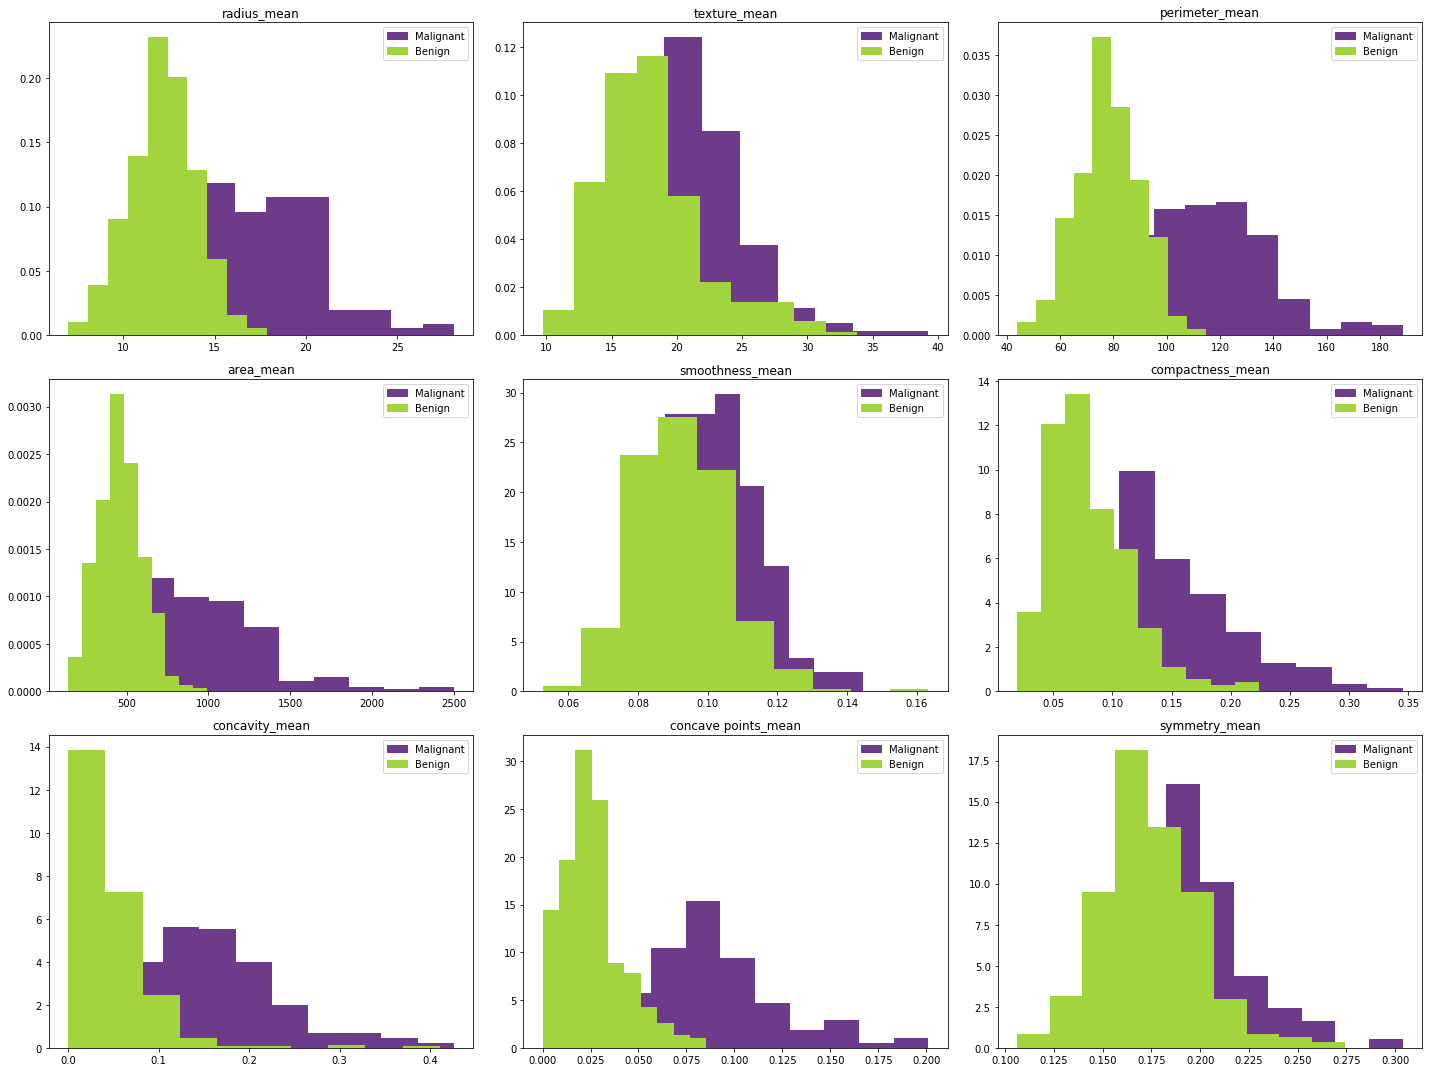

In [19]:
plt.figure(figsize=(20, 15))
for ii, col in enumerate(data.columns[2:11]):
    plt.subplot(3,3,ii+1)
    plt.title(col)
    plt.legend(handles = [patches.Patch(label = 'Malignant', color=(.43,.23,.54)),
                          patches.Patch(label = 'Benign', color=(.63,.83,.24))])
    b = data[data['diagnosis'] == 'B'][col]
    m = data[data['diagnosis'] == 'M'][col]
    plt.hist(m, stacked=True, normed = True, color=(.43,.23,.54))
    plt.hist(b, stacked=True, normed = True, color=(.63,.83,.24))
    
plt.tight_layout()
plt.show()

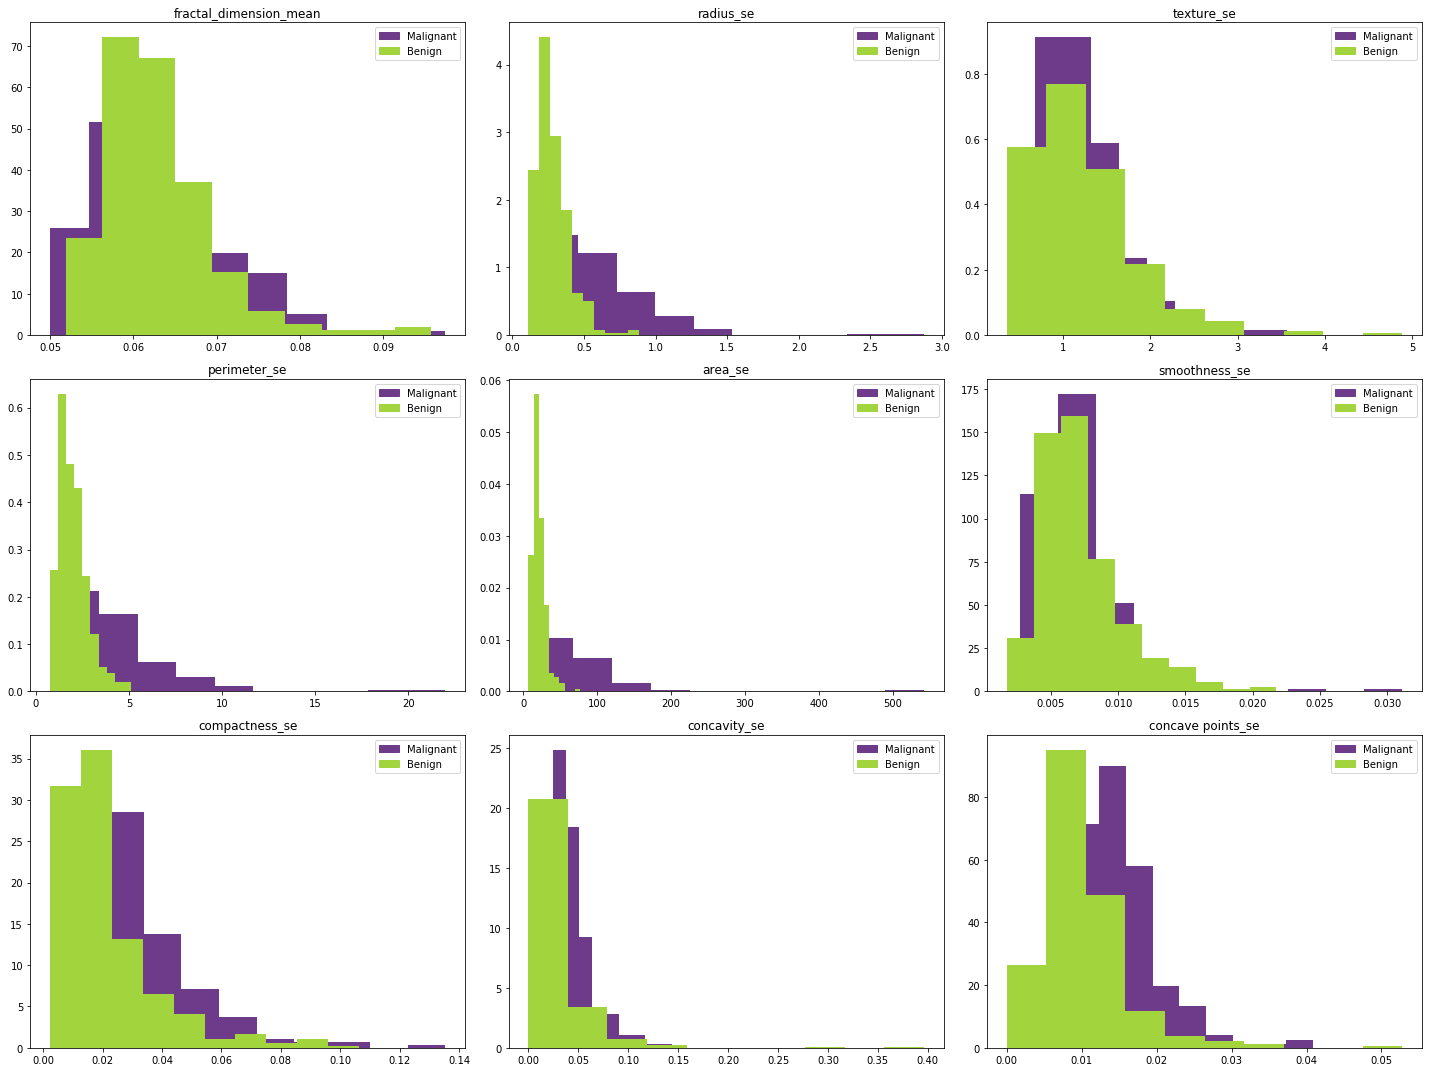

In [20]:
plt.figure(figsize=(20, 15))
for ii, col in enumerate(data.columns[11:20]):
    plt.subplot(3,3,ii+1)
    plt.title(col)
    plt.legend(handles = [patches.Patch(label = 'Malignant', color=(.43,.23,.54)),
                          patches.Patch(label = 'Benign', color=(.63,.83,.24))])
    b = data[data['diagnosis'] == 'B'][col]
    m = data[data['diagnosis'] == 'M'][col]
    plt.hist(m, stacked=True, normed = True, color=(.43,.23,.54))
    plt.hist(b, stacked=True, normed = True, color=(.63,.83,.24))
    
plt.tight_layout()
plt.show()

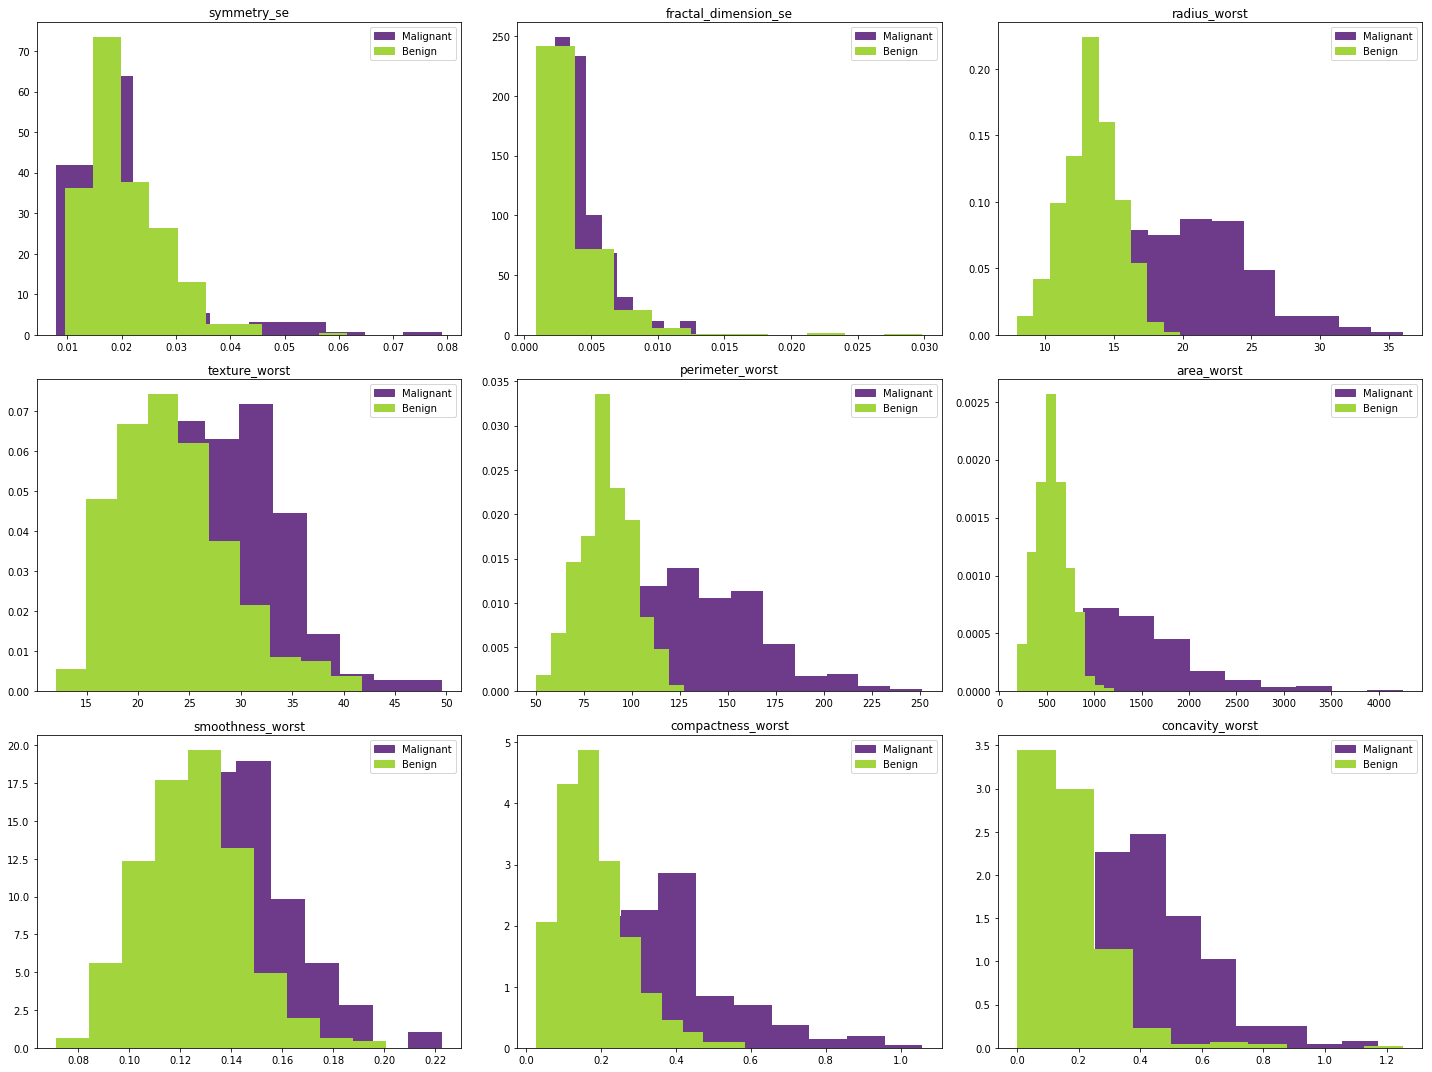

In [21]:
plt.figure(figsize=(20, 15))
for ii, col in enumerate(data.columns[20:29]):
    plt.subplot(3,3,ii+1)
    plt.title(col)
    plt.legend(handles = [patches.Patch(label = 'Malignant', color=(.43,.23,.54)),
                          patches.Patch(label = 'Benign', color=(.63,.83,.24))])
    b = data[data['diagnosis'] == 'B'][col]
    m = data[data['diagnosis'] == 'M'][col]
    plt.hist(m, stacked=True, normed = True, color=(.43,.23,.54))
    plt.hist(b, stacked=True, normed = True, color=(.63,.83,.24))
    
plt.tight_layout()
plt.show()

In [22]:
binarizer = LabelBinarizer().fit(data['diagnosis'])
data.iloc[:,2:32] = StandardScaler().fit_transform(data.iloc[:,2:32])
data['diagnosis'] = binarizer.transform(data['diagnosis'])

data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,0,-0.743348,1.079841,-0.718729,-0.714976,-0.266890,-0.042470,0.281240,-0.202977,...,1.869899,-0.744086,-0.714386,-0.112597,-0.016317,0.435670,-0.275239,-1.276034,0.186983,NaN
560,925292,0,-0.021952,1.829157,-0.024262,-0.154973,0.208495,0.156521,-0.554670,-0.151647,...,1.220152,-0.210324,-0.305671,-0.362461,-0.177261,-0.669679,-0.149315,-1.052780,-0.040776,NaN
561,925311,0,-0.831392,2.345765,-0.877311,-0.764748,-1.556408,-1.303122,-1.114873,-1.261820,...,2.055541,-0.955268,-0.775210,-1.740223,-1.267986,-1.305831,-1.745063,-2.159342,-1.379622,NaN
562,925622,1,0.310345,2.636649,0.470844,0.176365,0.600616,1.977758,2.086645,1.170295,...,2.786709,0.638572,0.060502,0.409050,3.418837,4.307272,1.842324,1.922319,3.156163,NaN
563,926125,1,1.929226,1.349781,2.101976,1.968434,0.963560,2.260135,2.870075,2.540213,...,0.607860,2.139779,1.649655,0.365215,1.045400,1.860055,2.125538,0.045693,0.819278,NaN
564,926424,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,NaN
565,926682,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,NaN
566,926954,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,NaN
567,927241,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,NaN
568,92751,0,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,...,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207,NaN


In [23]:
train_attrs = data.iloc[:400,2:32].as_matrix()
train_labels = data.iloc[:400,1].as_matrix()
test_attrs = data.iloc[400:,2:32].as_matrix()
test_labels = data.iloc[400:,1].as_matrix()

In [24]:
def labeler(x):
    
    return np.array([0 if i<0.5 else 1 for i in x])

class LogisticRegression:
    
    def __init__(self, X, y, max_iter=1000):
        
        self.X = self.add_bias(X)
        self.y = y
        self.weights = np.random.randn(self.X.shape[1]) * 15
        self.max_iter = max_iter
        
    def add_bias(self, X):
        
        return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    
    def sigmoid(self, z):
        
        return 1.0/(1.0 + np.exp(-z))
    
    def gradient(self, weights):
        
        def partial_derivative(weight):
            
            return 1.0/len(self.X) * sum((self.predict(self.X) - self.y) * (self.X[:, weight]))
       
        gradient = np.array([partial_derivative(weight) for weight in range(len(weights))])
        return gradient
    def gradient_descent(self, learning_rate=0.01, loop=0):
        
        while loop < self.max_iter:
            self.weights = self.weights - (learning_rate * self.gradient(self.weights))
            if loop % 100 == 0:
                acc = (test_labels == labeler(clf.predict(clf.add_bias(test_attrs)))).mean()
                print("At iteration {0} the accuracy is {1}".format(loop, acc))
            loop+=1
            
            
        return self
    def predict(self, X):
      
        return np.array([self.sigmoid(np.dot(self.weights, x)) for x in X])

In [25]:
clf = LogisticRegression(train_attrs, train_labels, 10000)
clf.gradient_descent()

At iteration 0 the accuracy is 0.5443786982248521
At iteration 100 the accuracy is 0.5562130177514792
At iteration 200 the accuracy is 0.5857988165680473
At iteration 300 the accuracy is 0.5976331360946746
At iteration 400 the accuracy is 0.6094674556213018
At iteration 500 the accuracy is 0.6331360946745562
At iteration 600 the accuracy is 0.650887573964497
At iteration 700 the accuracy is 0.6686390532544378
At iteration 800 the accuracy is 0.6923076923076923
At iteration 900 the accuracy is 0.7041420118343196
At iteration 1000 the accuracy is 0.7041420118343196
At iteration 1100 the accuracy is 0.7218934911242604
At iteration 1200 the accuracy is 0.727810650887574
At iteration 1300 the accuracy is 0.7396449704142012
At iteration 1400 the accuracy is 0.7396449704142012
At iteration 1500 the accuracy is 0.7455621301775148
At iteration 1600 the accuracy is 0.7455621301775148
At iteration 1700 the accuracy is 0.7633136094674556
At iteration 1800 the accuracy is 0.7633136094674556
At iter

In [26]:
(test_labels == labeler(clf.predict(clf.add_bias(test_attrs)))).mean()

0.86982248520710059